<a href="https://colab.research.google.com/github/yeseul106/UROP_Software-Fault-Prediction/blob/main/UROP_NN_CM1_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# csv 파일 읽어오기
CM1 = pd.read_csv('/content/drive/MyDrive/UROP/Dataset/CM1.csv', encoding='cp949', header=None)
print(CM1.shape)
CM1.head(5)

(498, 22)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [11]:
# 입력 데이터
input_data = CM1.loc[:,:20].to_numpy()
print("input_data shape : ",input_data.shape)

input_data shape :  (498, 21)


In [12]:
input_data[0]

array([1.1, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 2. ,
       2. , 2. , 2. , 1.2, 1.2, 1.2, 1.2, 1.4])

In [13]:
# 정답 레이블
y_label = CM1.loc[:,21].to_numpy()
print("y_label shape : ",y_label.shape)

y_label shape :  (498,)


In [14]:
y_label[0]

False

In [15]:
# 레이블 벡터화 
y_label = np.asarray(y_label).astype('float32')

In [16]:
y_label.shape

(498,)

# **정규화 (Normalization)**

In [17]:
from sklearn import preprocessing

# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(input_data) # 데이터를 0~1 범위로 점철되게 함수 수행
data_normalized.shape

(498, 21)

In [18]:
data_normalized[0]

array([2.36966825e-04, 4.21052632e-03, 1.37931034e-02, 6.45161290e-03,
       1.44648023e-04, 7.59156005e-05, 1.00000000e+00, 1.03363282e-02,
       4.42658676e-03, 6.03615014e-07, 2.27670753e-01, 1.08650702e-05,
       2.50000000e-02, 5.89970501e-03, 1.21951220e-02, 1.00000000e+00,
       2.81690141e-03, 3.82165605e-03, 1.58730159e-04, 1.47420147e-03,
       2.48447205e-03])

# **TrainData와 TestData의 분리**

In [19]:
from sklearn.model_selection import train_test_split

#학습셋과 테스트셋의 구분
seed=0
X_train, X_test, Y_train, Y_test = train_test_split(data_normalized,y_label, test_size =0.3, random_state = seed)

print("X_train의 shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train의 shape: (348, 21)
X_test shape: (150, 21)
Y_train shape: (348,)
Y_test shape: (150,)


# **모델 설계**

# **실험 2**
- epoch : 200
- optimizer : adam 함수

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(21,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [35]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['AUC'])

In [36]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=7, verbose=1)

Epoch 1/200
50/50 [==============================] - 2s 11ms/step - loss: 0.5254 - auc: 0.5284 - val_loss: 0.3993 - val_auc: 0.2521
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3987 - auc: 0.4178 - val_loss: 0.3605 - val_auc: 0.3323
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3958 - auc: 0.3934 - val_loss: 0.3402 - val_auc: 0.4980
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3681 - auc: 0.5096 - val_loss: 0.3262 - val_auc: 0.6195
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3406 - auc: 0.5487 - val_loss: 0.3205 - val_auc: 0.6607
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3250 - auc: 0.6079 - val_loss: 0.3177 - val_auc: 0.6756
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3190 - auc: 0.6229 - val_loss: 0.3198 - val_auc: 0.6921
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 0.2922 - 

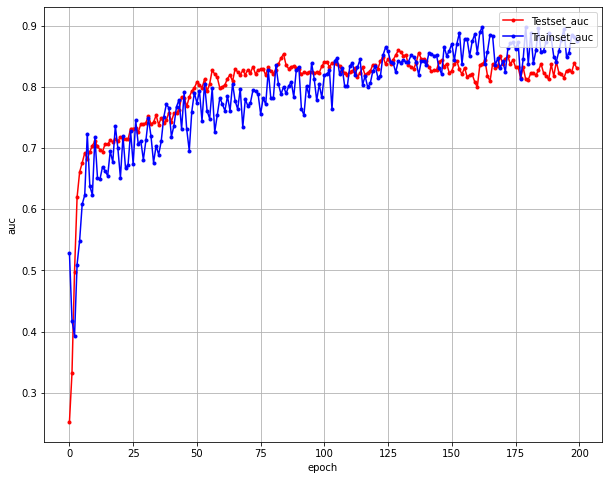

In [37]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['auc']
val_auc = history_dict['val_auc']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_auc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_auc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [38]:
print("\n Train AUC : %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n Test AUC : %.4f" % (model.evaluate(X_test, Y_test)[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.1919 - auc: 0.9289

 Train AUC : 0.9289
5/5 [==============================] - 0s 3ms/step - loss: 0.5331 - auc: 0.8309

 Test AUC : 0.8309


In [39]:
print("\n Train Loss : %.4f" % (model.evaluate(X_train, Y_train)[0]))
print("\n Test Loss : %.4f" % (model.evaluate(X_test, Y_test)[0]))

11/11 [==============================] - 0s 2ms/step - loss: 0.1919 - auc: 0.9289

 Train Loss : 0.1919
5/5 [==============================] - 0s 3ms/step - loss: 0.5331 - auc: 0.8309

 Test Loss : 0.5331


# **Accuracy로 컴파일**

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(21,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [30]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=7, verbose=1)

Epoch 1/200
50/50 [==============================] - 1s 8ms/step - loss: 0.5531 - accuracy: 0.8822 - val_loss: 0.4283 - val_accuracy: 0.9000
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.9023 - val_loss: 0.3489 - val_accuracy: 0.9000
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.9023 - val_loss: 0.3320 - val_accuracy: 0.9000
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.9023 - val_loss: 0.3225 - val_accuracy: 0.9000
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.9023 - val_loss: 0.3189 - val_accuracy: 0.9000
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.9023 - val_loss: 0.3153 - val_accuracy: 0.9000
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.9023 - val_loss: 0.3117 - val_accuracy: 0.9000
Epoch 8/200
5

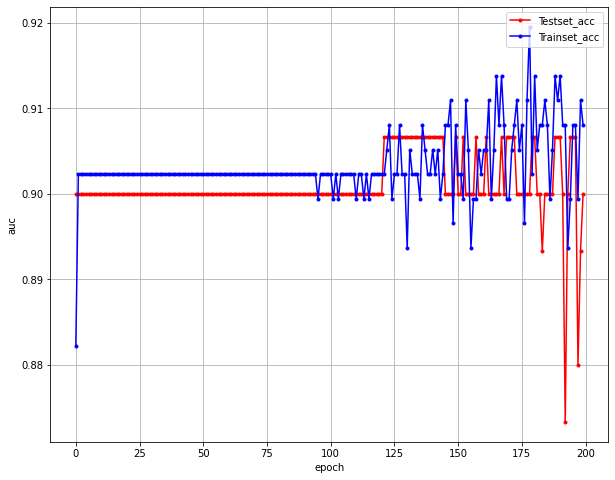

In [32]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['accuracy']
val_auc = history_dict['val_accuracy']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_acc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_acc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [33]:
print("\n Train Acc : %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n Test Acc : %.4f" % (model.evaluate(X_test, Y_test)[1]))

11/11 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9253

 Train Acc : 0.9253
5/5 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.9000

 Test Acc : 0.9000
